In [2]:
import json
import pandas as pd
import numpy as np
import sys
import csv
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


csv.field_size_limit(sys.maxsize)


131072

In [3]:
chunks = pd.read_csv("/content/drive/MyDrive/yelp_data_ready3.csv", engine='python', chunksize = 500000)
counter = 1
for c in chunks:
  if counter == 1: 
    print(counter)
    df = c.copy()
    counter += 1
  else: 
    print(counter)
    df = pd.concat([df,c])
    counter += 1
  #Chunk is like a list of dataframes


1
2
3
4
5
6
7
8


In [23]:
df.head()

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,stars_x,date,review_year,review_month,review_date,...,is_vegan_restaurant,is_vegetarian_restaurant,is_omnivore_restaurant,biz_veg_code,user_vegan,user_vegetarian,user_omnivore,user_veg_code,biz_veg_code2,user_veg_code2
0,0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11,2018,7,7,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
1,1,1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,2017-05-13 17:06:55,2017,5,13,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
2,2,2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2017-08-08 00:58:18,2017,8,8,...,0,0,1,Omnivore,0.020619,0.041237,0.938144,Omnivore,Omnivore,Omnivore
3,3,3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,2017-11-19 02:20:23,2017,11,19,...,0,0,1,Omnivore,0.018692,0.018692,0.962617,Omnivore,Omnivore,Omnivore
4,4,4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2,2017-09-09 17:49:47,2017,9,9,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,PcX2F0Fowd96vJRwnalU9g,zh_n5d_J-_0gN5synJAxig,XQfwVwDr-v0ZS3_CbbE5Xw,1,2017-07-15 19:38:37,2017,7,15,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
96,96,96,wQPCOYTPAvC69C_Q0MvmqA,KM76791235_ozKYDmvLBIg,XQfwVwDr-v0ZS3_CbbE5Xw,5,2019-02-25 18:19:37,2019,2,25,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
97,97,97,N1tYrstTLQyBQ9C6Gm1NpA,M35oC4raBRPKtj4Sws__Ow,XQfwVwDr-v0ZS3_CbbE5Xw,3,2017-08-27 23:38:29,2017,8,27,...,0,0,1,Omnivore,0.000000,0.000000,1.000000,Omnivore,Omnivore,Omnivore
98,98,98,rak6ESPDD1Wx6aRbET9hWg,EuopqHg-cCgb0MjbIRCWJQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2018-07-23 23:09:28,2018,7,23,...,0,0,1,Omnivore,0.034483,0.041379,0.924138,Omnivore,Omnivore,Omnivore


In [20]:
#Defining a category called "Veg" that collapses across vegetarians and vegans

def veg_code2(veg_code):
  if veg_code == "Vegetarian":
    return 'Veg'
  if veg_code == 'Vegan':
    return 'Veg'
  return 'Omnivore'

df['biz_veg_code2'] = df.apply(lambda x: veg_code2(x['biz_veg_code']), axis = 1)
df['user_veg_code2'] = df.apply(lambda x: veg_code2(x['user_veg_code']), axis = 1)



In [ ]:
#Counting the number of unique businesses of each type
len(np.unique(df['business_id'][df['is_vegan_restaurant'] ==1]))

720

In [ ]:
len(np.unique(df['business_id'][df['is_vegetarian_restaurant'] ==1]))

661

In [ ]:
len(np.unique(df['business_id'][df['is_omnivore_restaurant'] ==1]))

42737

In [ ]:
#Checking calculation: The three entries above do sum to 44118 restaurants in total
len(np.unique(df['business_id']))

44118

In [ ]:
#Calculating the number of users of teach type
len(np.unique(df['user_id'][df['user_veg_code'] =='Vegan']))

50715

In [ ]:
len(np.unique(df['user_id'][df['user_veg_code'] =='Vegetarian']))

46496

In [ ]:
len(np.unique(df['user_id'][df['user_veg_code'] =='Omnivore']))

1189010

In [ ]:
#Counting the number of reviews from users of each type
len(np.unique(df['review_id'][df['user_veg_code'] =='Omnivore']))

3573217

In [ ]:
len(np.unique(df['review_id'][df['user_veg_code'] =='Vegan']))

147313

In [ ]:
len(np.unique(df['review_id'][df['user_veg_code'] =='Vegetarian']))

123162

In [38]:
len(np.unique(df['review_id'][df['user_veg_code2'] =='Veg']))

270475

In [52]:
len(np.unique(df['review_id'][df['user_veg_code2'] =='Omnivore']))

3573217

In [ ]:
#Total number of reviews
len(np.unique(df['review_id']))

3843692

In [ ]:
df.shape

(3843692, 28)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b3c16b50>]],
      dtype=object)

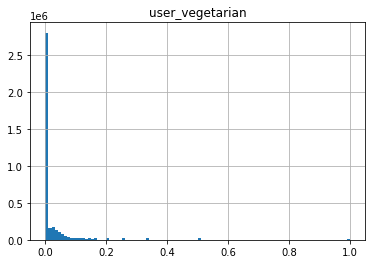

In [ ]:
#Distribution of how many reviews of vegetarian restaurants users have
df.hist(column = 'user_vegetarian', bins =100 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b0e96550>]],
      dtype=object)

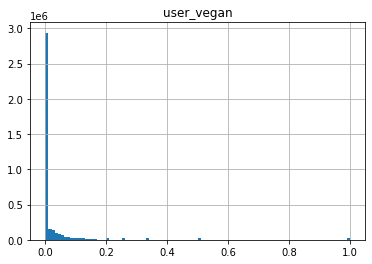

In [ ]:
df.hist(column = 'user_vegan', bins =100 )

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Star Rating by Food Type')

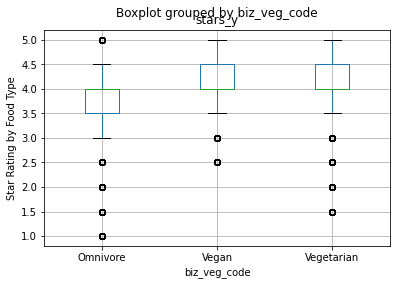

In [ ]:
df.boxplot(by = 'biz_veg_code', column = 'stars_y')
plt.ylabel('Star Rating by Food Type')


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Number of Reviews by Food Type')

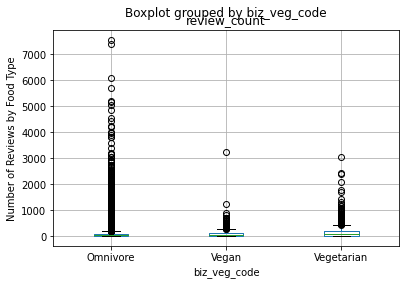

In [ ]:
df.boxplot(by = 'biz_veg_code', column = 'review_count')
plt.ylabel('Number of Reviews by Food Type')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


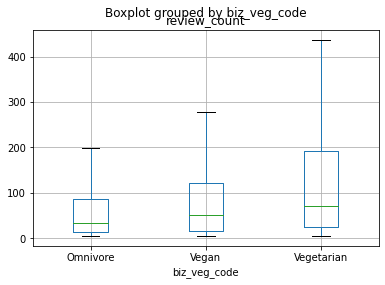

In [ ]:
df.boxplot(by = 'biz_veg_code', column = 'review_count', showfliers=False)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Number of Reviews by Food Type')

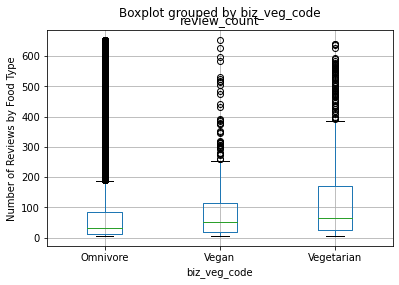

In [ ]:
from scipy import stats
#removing outliers beyond 3 sd.
df = df[(np.abs(stats.zscore(df['review_count'])) < 3)]
df.boxplot(by = 'biz_veg_code', column = 'review_count')
plt.ylabel('Number of Reviews by Food Type')

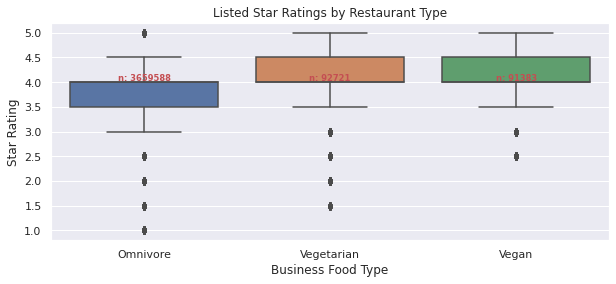

In [ ]:
# libraries & dataset
import seaborn as sns
sns.set(style="darkgrid")
 
ax = sns.boxplot(x="biz_veg_code", y="stars_y", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Listed Star Ratings by Restaurant Type')
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['biz_veg_code'])['stars_y'].median().values
nobs = df['biz_veg_code'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='r',
            weight='semibold'
            )
 
plt.show()

In [ ]:
medians

array([4., 4., 4.])

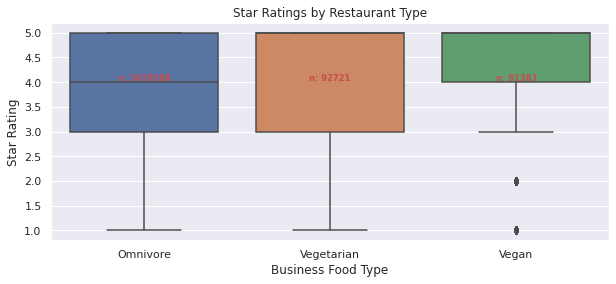

In [ ]:
# libraries & dataset
import seaborn as sns
sns.set(style="darkgrid")
 
ax = sns.boxplot(x="biz_veg_code", y="stars_x", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Star Ratings by Restaurant Type')
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['biz_veg_code'])['stars_y'].median().values
nobs = df['biz_veg_code'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='r',
            weight='semibold'
            )
 
plt.show()

In [ ]:
medians

array([4., 4., 4.])

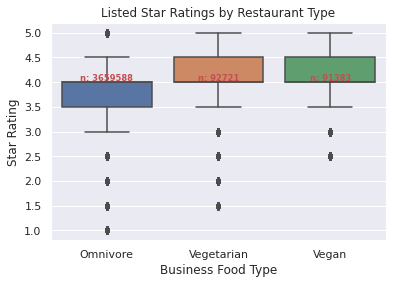

In [12]:
# libraries & dataset
import seaborn as sns
sns.set(style="darkgrid")
 
ax = sns.boxplot(x="biz_veg_code", y="stars_y", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Listed Star Ratings by Restaurant Type')
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['biz_veg_code'])['stars_y'].median().values
nobs = df['biz_veg_code'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='r',
            weight='semibold'
            )
 
plt.show()

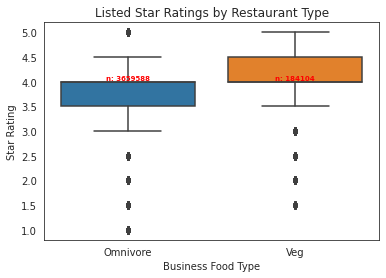

In [42]:
ax = sns.boxplot(x="biz_veg_code2", y="stars_y", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Listed Star Ratings by Restaurant Type')
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['biz_veg_code2'])['stars_y'].median().values
nobs = df['biz_veg_code2'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='r',
            weight='semibold'
            )
 
plt.show()

[Text(0, 0.5, 'Star Rating'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Listed Star Ratings by Restaurant Type')]

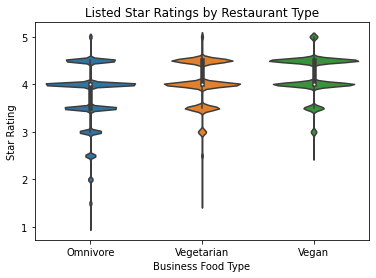

In [11]:
ax = sns.violinplot(x="biz_veg_code", y="stars_y", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Listed Star Ratings by Restaurant Type')


[Text(0, 0.5, 'Star Rating'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Listed Star Ratings by Restaurant Type')]

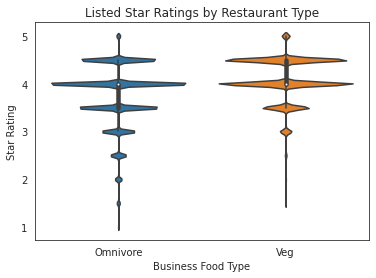

In [43]:
ax = sns.violinplot(x="biz_veg_code2", y="stars_y", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Listed Star Ratings by Restaurant Type')

[Text(0, 0.5, 'Star Rating'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Star Ratings by Restaurant Type')]

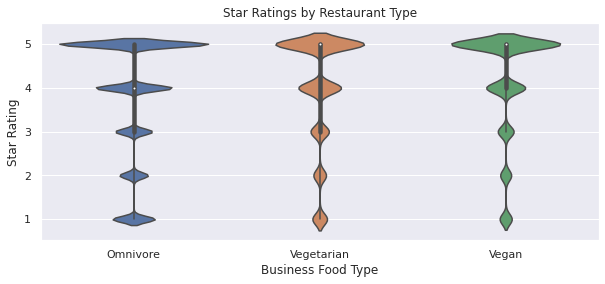

In [ ]:
ax = sns.violinplot(x="biz_veg_code", y="stars_x", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Star Ratings by Restaurant Type')

[Text(0, 0.5, 'Star Rating'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Star Ratings by Restaurant Type')]

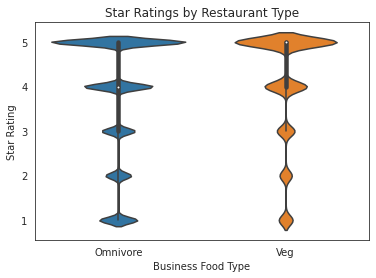

In [44]:
ax = sns.violinplot(x="biz_veg_code2", y="stars_x", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Star Rating', title = 'Star Ratings by Restaurant Type')

[Text(0, 0.5, 'Review Count'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Review Count Per Restaurant by Restaurant Type')]

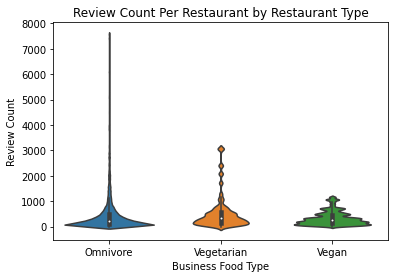

In [ ]:
ax = sns.violinplot(x="biz_veg_code", y="review_count", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Review Count', title = 'Review Count Per Restaurant by Restaurant Type')

[Text(0, 0.5, 'Review Count'),
 Text(0.5, 0, 'Business Food Type'),
 Text(0.5, 1.0, 'Review Count Per Restaurant by Restaurant Type')]

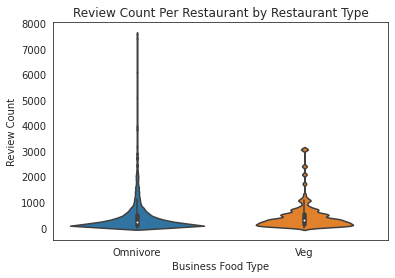

In [45]:
ax = sns.violinplot(x="biz_veg_code2", y="review_count", data= df)
ax.set(xlabel='Business Food Type', ylabel = 'Review Count', title = 'Review Count Per Restaurant by Restaurant Type')

In [ ]:
omnivore_rows=df.query('biz_veg_code == "Omnivore"')
omni_entries=omnivore_rows.stars_y
vegan_rows=df.query('biz_veg_code == "Vegan"')    
vegan_entries=vegan_rows.stars_y
vegetarian_rows=df.query('biz_veg_code == "Vegetarian"')
vegetarian_entries=vegetarian_rows.stars_y

In [ ]:
stats.kruskal(omni_entries, vegan_entries, vegetarian_entries)

KruskalResult(statistic=52155.19132388996, pvalue=0.0)

In [12]:
omnivore_rows=df.query('biz_veg_code == "Omnivore"')
omni_entries=omnivore_rows.stars_x
vegan_rows=df.query('biz_veg_code == "Vegan"')    
vegan_entries=vegan_rows.stars_x
vegetarian_rows=df.query('biz_veg_code == "Vegetarian"')
vegetarian_entries=vegetarian_rows.stars_x
veg_rows=df.query('biz_veg_code == "Vegetarian" or biz_veg_code == "Vegan"')
veg_entries=veg_rows.stars_x

stats.kruskal(omni_entries, vegan_entries, vegetarian_entries)

KruskalResult(statistic=9740.623761794463, pvalue=0.0)

In [13]:
stats.kruskal(omni_entries, veg_entries)

KruskalResult(statistic=8672.966548018409, pvalue=0.0)

In [50]:
from scipy.stats.mstats_basic import ttest_ind
#Double-checking the above
omnivore_rows=df.query('biz_veg_code2 == "Omnivore"')
omni_entries=omnivore_rows.stars_x
veg_rows=df.query('biz_veg_code2 == "Veg"')    
veg_entries=vegan_rows.stars_x

stats.ttest_ind(omni_entries, veg_entries, axis=0, nan_policy='propagate', equal_var=False,  permutations=None, random_state=None, trim=0, alternative='two-sided')

Ttest_indResult(statistic=-99.77378076365562, pvalue=0.0)

In [51]:
summary_ratings = df.groupby('biz_veg_code2')['stars_x'].agg([np.mean, np.std, np.var])
print(summary_ratings)

                   mean       std       var
biz_veg_code2                              
Omnivore       3.784284  1.411454  1.992202
Veg            4.096728  1.245099  1.550271


In [ ]:
omnivore_rows=df.query('user_veg_code == "Omnivore"')
omni_entries=omnivore_rows.stars_x
vegan_rows=df.query('user_veg_code == "Vegan"')    
vegan_entries=vegan_rows.stars_x
vegetarian_rows=df.query('user_veg_code == "Vegetarian"')
vegetarian_entries=vegetarian_rows.stars_x

stats.kruskal(omni_entries, vegan_entries, vegetarian_entries)

KruskalResult(statistic=7920.389577821317, pvalue=0.0)

In [ ]:
#This shows all three medians are statistically different from each other, though it's unclear how this can be if they're all 4.
!pip install scikit-posthocs

import scikit_posthocs as sp
dunn_test = [omni_entries, vegan_entries, vegetarian_entries]
sp.posthoc_dunn(dunn_test, p_adjust = 'bonferroni')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,1,2,3
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0


In [ ]:
#Number of rows in review data frame is 3843692
df.shape

(3843692, 28)

In [ ]:
#No missing data in reviews, only a few postal codes missing
np.sum(df.isnull())

Unnamed: 0                    0
Unnamed: 0.1                  0
review_id                     0
user_id                       0
business_id                   0
stars_x                       0
date                          0
review_year                   0
review_month                  0
review_date                   0
city                          0
state                         0
postal_code                 218
latitude                      0
longitude                     0
stars_y                       0
review_count                  0
is_open                       0
categories                    0
is_restaurant                 0
is_vegan_restaurant           0
is_vegetarian_restaurant      0
is_omnivore_restaurant        0
biz_veg_code                  0
user_vegan                    0
user_vegetarian               0
user_omnivore                 0
user_veg_code                 0
dtype: int64

In [ ]:
#from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
grouped_df = df.groupby(by=["review_year","biz_veg_code"], as_index=False).agg(
    {"stars_x": "mean"}
)

In [ ]:
fig2 = px.line(data_frame = grouped_df, x='review_year', y='stars_x', labels={
                     'review_year': 'Review Year',
                     'stars_x': 'Average Star Rating',
                     'biz_veg_code': 'Restaurant Food Type'
                     }, 
               line_group = 'biz_veg_code', color = 'biz_veg_code', color_discrete_sequence=['red','green','blue'], title = 'Star Rating by Food Type over Time')
fig2.update_layout(
    title={
        'text': "Star Rating by Restaurant Type over Time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_xaxes(dtick = 1)
fig2.update_layout(yaxis=dict(range=[0,5]))
fig2.show()
#This is graphing the restaurant reviews by year

In [47]:
grouped_df = df.groupby(by=["review_year","biz_veg_code2"], as_index=False).agg(
    {"stars_x": "mean"}
)

fig2 = px.line(data_frame = grouped_df, x='review_year', y='stars_x', labels={
                     'review_year': 'Review Year',
                     'stars_x': 'Average Star Rating',
                     'biz_veg_code2': 'Restaurant Food Type'
                     }, 
               line_group = 'biz_veg_code2', color = 'biz_veg_code2', color_discrete_sequence=['red','green','blue'], title = 'Star Rating by Food Type over Time')
fig2.update_layout(
    title={
        'text': "Star Rating by Restaurant Type over Time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_xaxes(dtick = 1)
fig2.update_layout(yaxis=dict(range=[0,5]))
fig2.show()
#This is graphing the restaurant reviews by year

In [ ]:
summary_ratings = df.groupby('biz_veg_code')['stars_x'].agg([np.mean, np.std, np.var])
print(summary_ratings)

                  mean       std       var
biz_veg_code                              
Omnivore      3.784284  1.411454  1.992202
Vegan         4.188219  1.203354  1.448060
Vegetarian    4.006557  1.278531  1.634642


In [ ]:
stats.f_oneway(df['stars_x'][df['biz_veg_code'] == 'Omnivore'],
               df['stars_x'][df['biz_veg_code'] == 'Vegetarian'],
               df['stars_x'][df['biz_veg_code'] == 'Vegan'])

F_onewayResult(statistic=4727.0121423892715, pvalue=0.0)

In [ ]:
sp.posthoc_tukey(df, val_col='stars_x', group_col='biz_veg_code')

,Omnivore,Vegetarian,Vegan
Omnivore,1.000,0.001,0.001
Vegetarian,0.001,1.000,0.001
Vegan,0.001,0.001,1.000


In [39]:
#Welch test between veg and omnivore ratings
stats.ttest_ind(df['stars_x'][df['user_veg_code2'] == 'Veg'],
               df['stars_x'][df['user_veg_code2'] == 'Omnivore'], axis=0, nan_policy='propagate', equal_var=False,  permutations=None, random_state=None, trim=0, alternative='two-sided')

Ttest_indResult(statistic=74.56463180998638, pvalue=0.0)

In [41]:
summary_ratings = df.groupby('user_veg_code2')['stars_x'].agg([np.mean, np.std, np.var])
print(summary_ratings)

                    mean       std       var
user_veg_code2                              
Omnivore        3.784959  1.407699  1.981616
Veg             3.988032  1.362411  1.856165


In [ ]:
#count = trends_df[['user_veg_code','biz_veg_code', 'review_year']].value_counts()
count = df[['biz_veg_code', 'review_year']].value_counts()
print(count)

biz_veg_code  review_year
Omnivore      2018           579336
              2019           577746
              2017           523937
              2016           484884
              2015           447980
              2021           390882
              2020           340531
              2014           338962
              2013           248549
              2012           189074
              2011           155337
              2010            95064
              2009            51343
              2008            30639
Vegetarian    2018            23658
              2019            22553
              2017            22151
              2016            20801
Omnivore      2022            19848
Vegetarian    2015            18981
              2014            14506
              2021            12614
              2020            12503
              2013            10467
Omnivore      2007            10136
Vegetarian    2012             8740
Vegan         2019             7969
  

In [ ]:
grouped_df2 = df.groupby(by=["review_year","user_veg_code"], as_index=False).agg(
    {"stars_x": "mean"}
)

In [ ]:
fig3 = px.line(data_frame = grouped_df2, x='review_year', y='stars_x', labels={
                     'review_year': 'Review Year',
                     'stars_x': 'Average Star Rating',
                     'user_veg_code': 'Reviewer Type'
                     }, 
               color = 'user_veg_code', color_discrete_sequence=['red','green','blue'], title = 'Star Rating by Food Type over Time')
fig3.update_layout(
    title={
        'text': "Star Rating by Reviewer Type over Time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig3.update_xaxes(dtick = 1)
fig3.update_layout(yaxis=dict(range=[0,5]))
fig3.show()
#This is graphing the restaurant reviews by year

In [ ]:
#Graphing how each type of restaurant gets evaluated by people with different diets

fig4 = px.line(data_frame = df.groupby(by=["review_year","user_veg_code", "biz_veg_code"], as_index=False).agg({"stars_x": "mean"}), 
    x='review_year', y='stars_x', line_group = 'user_veg_code', color = 'user_veg_code', color_discrete_sequence=['red','green','blue'], facet_col = 'biz_veg_code', title = "Star Ratings by Restaurant Type and User Type", 
    labels={
                     'review_year': 'Review Year',
                     'stars_x': 'Average Star Rating',
                     'biz_veg_code': 'Restaurant Type',
                    'user_veg_code': 'Reviewer Type'
                     })
fig4.update_xaxes(dtick = 1)
fig4.update_yaxes(range = [0,5])

fig4.show()

In [37]:
#Graphing how each type of restaurant gets evaluated by people with different diets

fig5 = px.line(data_frame = df.groupby(by=["review_year","user_veg_code2", "biz_veg_code2"], as_index=False).agg({"stars_x": "mean"}), 
    x='review_year', y='stars_x', color = 'user_veg_code2', color_discrete_sequence=['red','green','blue'], facet_col = 'biz_veg_code2', title = "Star Ratings by Restaurant Type and User Type", 
    labels={
                     'review_year': 'Review Year',
                     'stars_x': 'Average Star Rating',
                     'biz_veg_code2': 'Restaurant Type',
                    'user_veg_code2': 'Reviewer Type'
                     })
fig5.update_xaxes(dtick = 1)
fig5.update_yaxes(range = [0,5])

fig5.show()

In [ ]:
summary_ratings = df.groupby('user_veg_code')['stars_x'].agg([np.mean, np.std, np.var])
print(summary_ratings)

                   mean       std       var
user_veg_code                              
Omnivore       3.784959  1.407699  1.981616
Vegan          4.046805  1.332825  1.776422
Vegetarian     3.917734  1.393731  1.942486


In [ ]:
stats.f_oneway(df['stars_x'][df['user_veg_code'] == 'Omnivore'],
               df['stars_x'][df['user_veg_code'] == 'Vegetarian'],
               df['stars_x'][df['user_veg_code'] == 'Vegan'])


F_onewayResult(statistic=2911.6981095735136, pvalue=0.0)

In [ ]:
sp.posthoc_tukey(df, val_col='stars_x', group_col='user_veg_code')

,Omnivore,Vegetarian,Vegan
Omnivore,1.000,0.001,0.001
Vegetarian,0.001,1.000,0.001
Vegan,0.001,0.001,1.000


In [ ]:
stats.ttest_ind(df['stars_x'][df['user_veg_code'] == 'Vegetarian'],
               df['stars_x'][df['user_veg_code'] == 'Vegan'], axis=0, nan_policy='propagate', equal_var=False,  permutations=None, random_state=None, trim=0, alternative='two-sided')

Ttest_indResult(statistic=-24.46618944747493, pvalue=4.795343902110805e-132)

In [ ]:
#Trying a Welch test between Omnivore and Vegan/Vegetarian aggregated
stats.ttest_ind(df['stars_x'][df['user_veg_code'] != 'Omnivore'],
               df['stars_x'][df['user_veg_code'] == 'Omnivore'], axis=0, nan_policy='propagate', equal_var=False,  permutations=None, random_state=None, trim=0, alternative='two-sided')

Ttest_indResult(statistic=74.56463180998638, pvalue=0.0)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'User Type'),
 Text(0.5, 1.0, 'Yearly Review Count by User Type')]

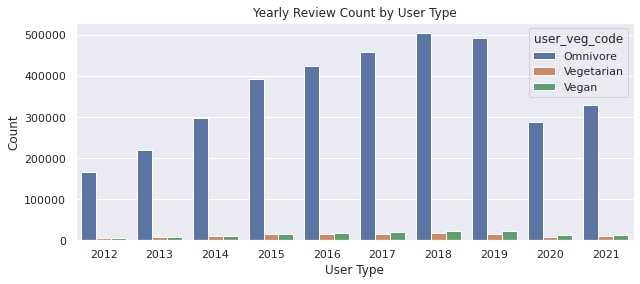

In [ ]:
#Graphing how each type of restaurant gets evaluated by people with different diets

# fig3 = px.histogram(data_frame = df.groupby(by=["review_year","user_veg_code", "biz_veg_code"], as_index=False).agg({"stars_x": "mean"}), 
#     x='review_year', color = 'user_veg_code', color_discrete_sequence=['red','green','blue'], facet_col = 'biz_veg_code', title = "Review Frequency by Food Type and User Type")
# fig3.update_xaxes(dtick = 1)
 
# fig3.show()
sns.set(rc={"figure.figsize":(10, 4)})
ax = sns.countplot(data=df, x="review_year", hue="user_veg_code")
ax.set(xlabel='Year', ylabel = 'Count', title = 'Yearly Review Count by User Type')



In [ ]:
df.review_year.value_counts()

2018    544237
2019    531439
2017    493800
2016    456795
2015    422155
2021    352795
2014    319147
2020    310361
2013    234472
2012    178491
Name: review_year, dtype: int64

In [ ]:
df.groupby('biz_veg_code').review_year.value_counts()

biz_veg_code  review_year
Omnivore      2018           517112
              2019           505734
              2017           469177
              2016           434860
              2015           402092
              2021           337795
              2014           304198
              2020           295271
              2013           223575
              2012           169774
Vegan         2018            14212
              2019            13834
              2017            12700
              2016            10375
              2015             9079
              2020             8524
              2021             8507
              2014             6663
              2013             4351
              2012             3138
Vegetarian    2018            12913
              2017            11923
              2019            11871
              2016            11560
              2015            10984
              2014             8286
              2020             6566
  

In [24]:
df.groupby('biz_veg_code2').review_year.value_counts()

biz_veg_code2  review_year
Omnivore       2018           517112
               2019           505734
               2017           469177
               2016           434860
               2015           402092
               2021           337795
               2014           304198
               2020           295271
               2013           223575
               2012           169774
Veg            2018            27125
               2019            25705
               2017            24623
               2016            21935
               2015            20063
               2020            15090
               2021            15000
               2014            14949
               2013            10897
               2012             8717
Name: review_year, dtype: int64

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'User Type'),
 Text(0.5, 1.0, 'Yearly Review Count by Restaurant Type')]

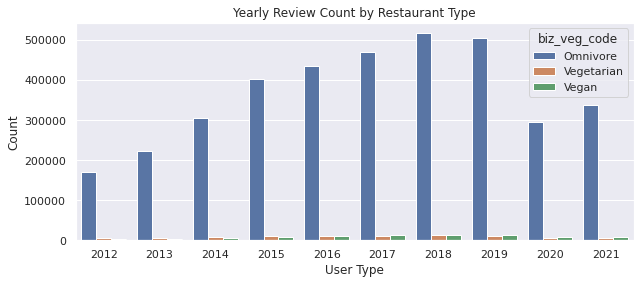

In [ ]:
#Graphing how each type of restaurant gets evaluated by people with different diets

# fig3 = px.histogram(data_frame = df.groupby(by=["review_year","user_veg_code", "biz_veg_code"], as_index=False).agg({"stars_x": "mean"}), 
#     x='review_year', color = 'user_veg_code', color_discrete_sequence=['red','green','blue'], facet_col = 'biz_veg_code', title = "Review Frequency by Food Type and User Type")
# fig3.update_xaxes(dtick = 1)
 
# fig3.show()
sns.set(rc={"figure.figsize":(10, 4)})
ax = sns.countplot(data=df, x="review_year", hue="biz_veg_code")
ax.set(xlabel='User Type', ylabel = 'Count', title = 'Yearly Review Count by Restaurant Type')

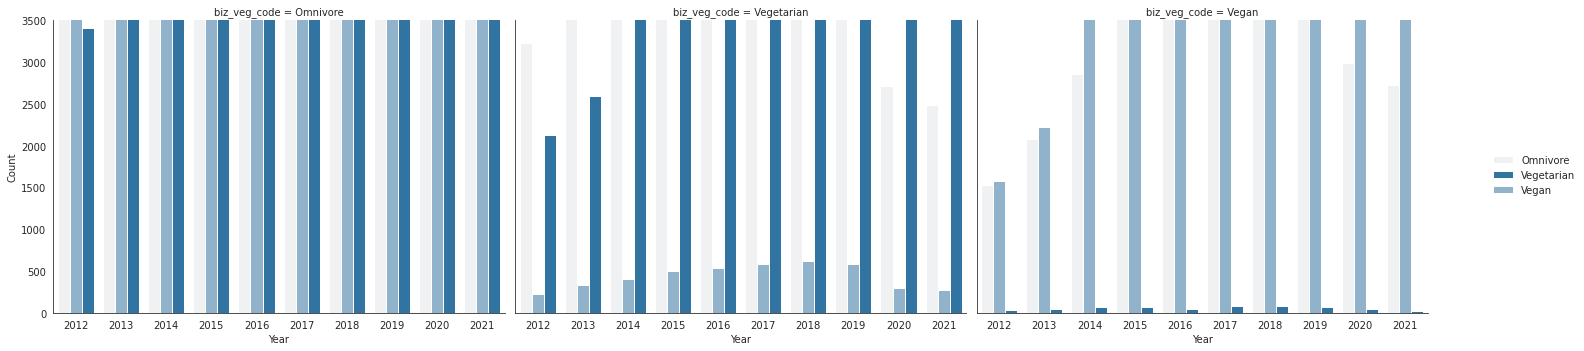

In [11]:
#sns.set(rc={"figure.figsize":(24, 36)})

#ax = sns.countplot(data=df, x="review_year", hue="user_veg_code")
#g = sns.FacetGrid(df, col="biz_veg_code")
#g.map_dataframe(sns.countplot(data=df, x="review_year", hue="user_veg_code"))

g = sns.FacetGrid(df, col ="biz_veg_code", height=5, aspect=7/5,margin_titles=True)
g.map_dataframe(sns.countplot, x="review_year", hue="user_veg_code")
g.set(xlabel='Year', ylabel = 'Count')
g.add_legend()
plt.ylim(0, 3500)
sns.set_style('white')



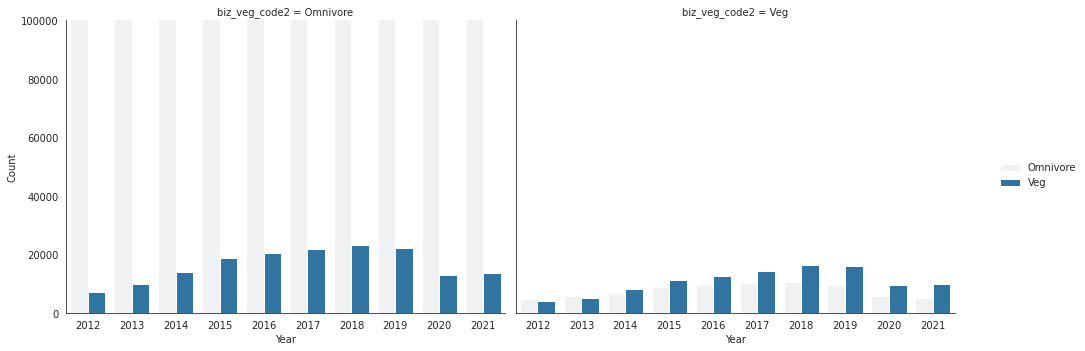

In [35]:
#Note that the Omni columns in the first facet go way higher to 500,000

g = sns.FacetGrid(df, col ="biz_veg_code2", height=5, aspect=7/5,margin_titles=True)
g.map_dataframe(sns.countplot, x="review_year", hue="user_veg_code2")
g.set(xlabel='Year', ylabel = 'Count')
g.add_legend()
plt.ylim(0, 100000)
sns.set_style('white')


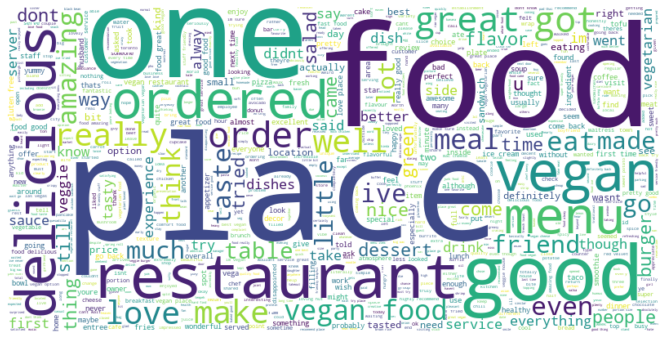

In [ ]:
#Vegan wordcloud from data set with text retained - uninformative

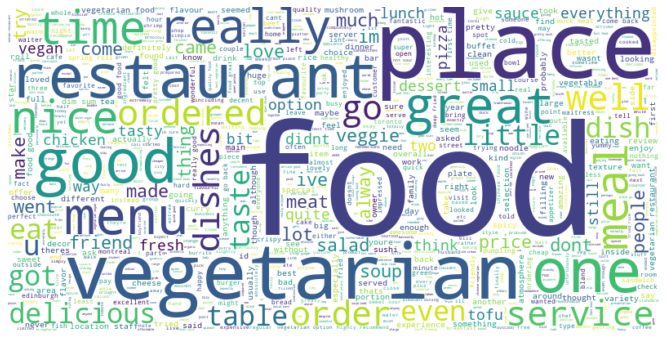

In [ ]:
#vegetarian wordcloud from data set with text retained - uninformative

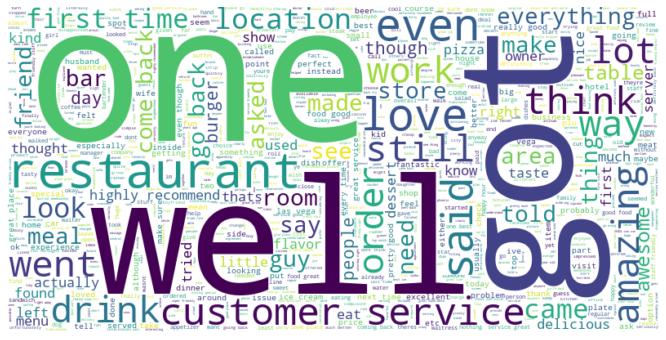

In [ ]:
#general restaurant subset wordcloud from data set with text retained - uninformative